In [1]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

---

# 🔧 Handling Missing Data

Data preprocessing is a crucial step in the **Data Science Lifecycle**.
In energy datasets (demand, production, weather, prices), we often face **missing values** due to:

* ⚡ Communication problems (smart meter failed to send data)
* 🌡️ Sensor malfunctions in extreme temperatures
* 📅 Reporting delays (holidays, manual inputs skipped)

Many algorithms **cannot handle NaNs**, so we need strategies to **detect, understand, and fix** missing values.

---


In [2]:
weather = pd.read_csv('data/weather_2022.csv',  delimiter=';', decimal='.', index_col = False)
weather.head()

,Local time in Tallinn (airport),T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,31.12.2022 23:00,5.8,744.1,747.2,-0.7,93.0,Wind blowing from the south-southwest,3.0,NaN,NaN,...,NaN,NaN,35.0,4.8,0.1,3.0,NaN,NaN,NaN,NaN
1,31.12.2022 22:00,5.9,744.3,747.3,-0.5,93.0,Wind blowing from the south-west,4.0,9.0,10.0,...,NaN,NaN,35.0,4.8,0.2,3.0,NaN,NaN,NaN,NaN
2,31.12.2022 21:00,5.8,744.4,747.4,-0.3,93.0,Wind blowing from the south-southwest,4.0,8.0,NaN,...,NaN,NaN,35.0,4.8,0.2,3.0,NaN,NaN,NaN,NaN
3,31.12.2022 20:00,5.7,744.8,747.8,-0.5,94.0,Wind blowing from the south-west,4.0,9.0,NaN,...,NaN,NaN,35.0,4.8,0.5,12.0,NaN,NaN,NaN,NaN
4,31.12.2022 19:00,5.4,744.8,747.9,-0.8,96.0,Wind blowing from the south-west,4.0,8.0,NaN,...,NaN,NaN,20.0,4.8,0.3,3.0,NaN,NaN,NaN,NaN


In [3]:
weather['timestamp'] = pd.to_datetime(weather['Local time in Tallinn (airport)'], dayfirst=True)
weather.set_index('timestamp', inplace=True)
weather.drop(columns=['Local time in Tallinn (airport)'], inplace=True)
weather.head()

,T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-12-31 23:00:00,5.8,744.1,747.2,-0.7,93.0,Wind blowing from the south-southwest,3.0,NaN,NaN,100%.,...,NaN,NaN,35.0,4.8,0.1,3.0,NaN,NaN,NaN,NaN
2022-12-31 22:00:00,5.9,744.3,747.3,-0.5,93.0,Wind blowing from the south-west,4.0,9.0,10.0,100%.,...,NaN,NaN,35.0,4.8,0.2,3.0,NaN,NaN,NaN,NaN
2022-12-31 21:00:00,5.8,744.4,747.4,-0.3,93.0,Wind blowing from the south-southwest,4.0,8.0,NaN,100%.,...,NaN,NaN,35.0,4.8,0.2,3.0,NaN,NaN,NaN,NaN
2022-12-31 20:00:00,5.7,744.8,747.8,-0.5,94.0,Wind blowing from the south-west,4.0,9.0,NaN,100%.,...,NaN,NaN,35.0,4.8,0.5,12.0,NaN,NaN,NaN,NaN
2022-12-31 19:00:00,5.4,744.8,747.9,-0.8,96.0,Wind blowing from the south-west,4.0,8.0,NaN,100%.,...,NaN,NaN,20.0,4.8,0.3,3.0,NaN,NaN,NaN,NaN


#  🔎 Detecting Missing Data

💡 Use `.isna()`, `.sum()`, or visualization libraries like **missingno** to detect patterns

## 🔧  Primitive tools

In [4]:
# Example: hourly demand with missing values
rng = pd.date_range("2024-01-01", periods=24, freq="H")
demand = np.random.randint(500, 800, size=24).astype(float)
demand[[3, 7, 14]] = np.nan   # simulate missing hours

df = pd.DataFrame({"time": rng, "demand_MWh": demand}).set_index("time")

print(df.head(10))
print("\nMissing values per column:")
print(df.isna().sum())

                     demand_MWh
time                           
2024-01-01 00:00:00       787.0
2024-01-01 01:00:00       632.0
2024-01-01 02:00:00       643.0
2024-01-01 03:00:00         NaN
2024-01-01 04:00:00       658.0
2024-01-01 05:00:00       549.0
2024-01-01 06:00:00       542.0
2024-01-01 07:00:00         NaN
2024-01-01 08:00:00       552.0
2024-01-01 09:00:00       640.0

Missing values per column:
demand_MWh    3
dtype: int64


In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8732 entries, 2022-12-31 23:00:00 to 2022-01-01 00:00:00
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       8732 non-null   float64
 1   Po      8732 non-null   float64
 2   P       8732 non-null   float64
 3   Pa      8624 non-null   float64
 4   U       8685 non-null   float64
 5   DD      8720 non-null   object 
 6   Ff      8721 non-null   float64
 7   ff10    1305 non-null   float64
 8   ff3     2404 non-null   float64
 9   N       8607 non-null   object 
 10  WW      8732 non-null   object 
 11  W1      8653 non-null   object 
 12  W2      8650 non-null   object 
 13  Tn      8649 non-null   float64
 14  Tx      8649 non-null   float64
 15  Cl      2612 non-null   object 
 16  Nh      6289 non-null   object 
 17  H       6521 non-null   object 
 18  Cm      2120 non-null   object 
 19  Ch      2091 non-null   object 
 20  VV      8682 non-null   float64
 21  T

In [6]:
missing_values = weather.isnull().sum()
missing_values

T          0
Po         0
P          0
Pa       108
U         47
DD        12
Ff        11
ff10    7427
ff3     6328
N        125
WW         0
W1        79
W2        82
Tn        83
Tx        83
Cl      6120
Nh      2443
H       2211
Cm      6612
Ch      6641
VV        50
Td        47
RRR       30
tR        30
E       8697
Tg      8732
E'      8567
sss     8582
dtype: int64

In [7]:
total_cells = np.product(weather.shape)
total_missing = missing_values.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

29.91746286237812


##  🖼️ Visualizing Missing Data with `missingno`

While `.isna().sum()` gives counts of missing values, it’s often hard to **see patterns** in large datasets.
The [`missingno`](https://github.com/ResidentMario/missingno) package provides **visual diagnostics** for missingness in Pandas DataFrames.

### 🔧 Installation

```bash
pip install missingno
```

### 📊 Main Functions


#### ✨ Matrix

Shows missing values as white lines across time. 

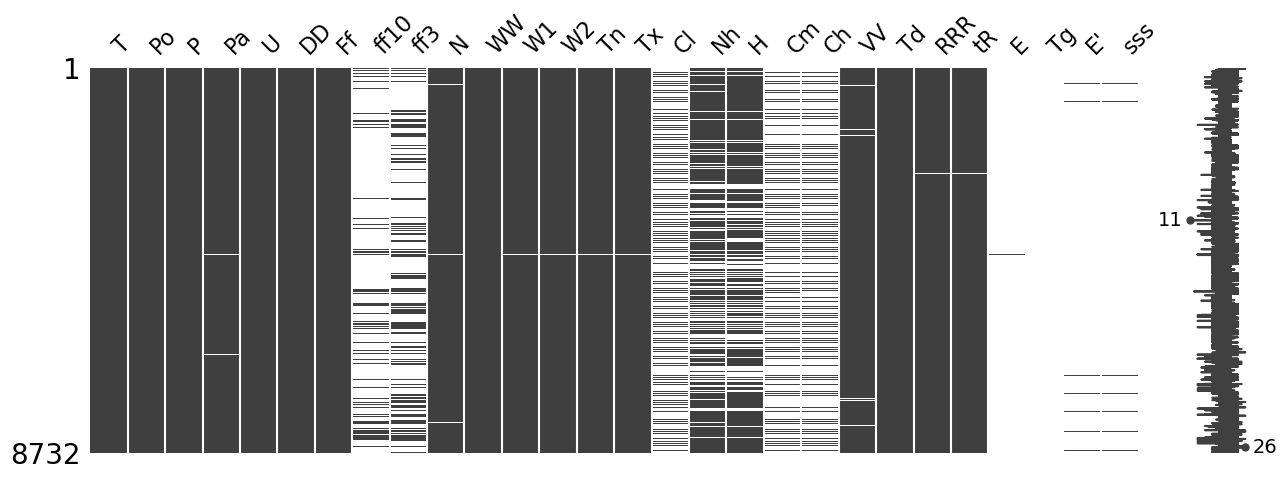

In [8]:
import missingno as msno

msno.matrix(weather, figsize=(15,5))
plt.show();

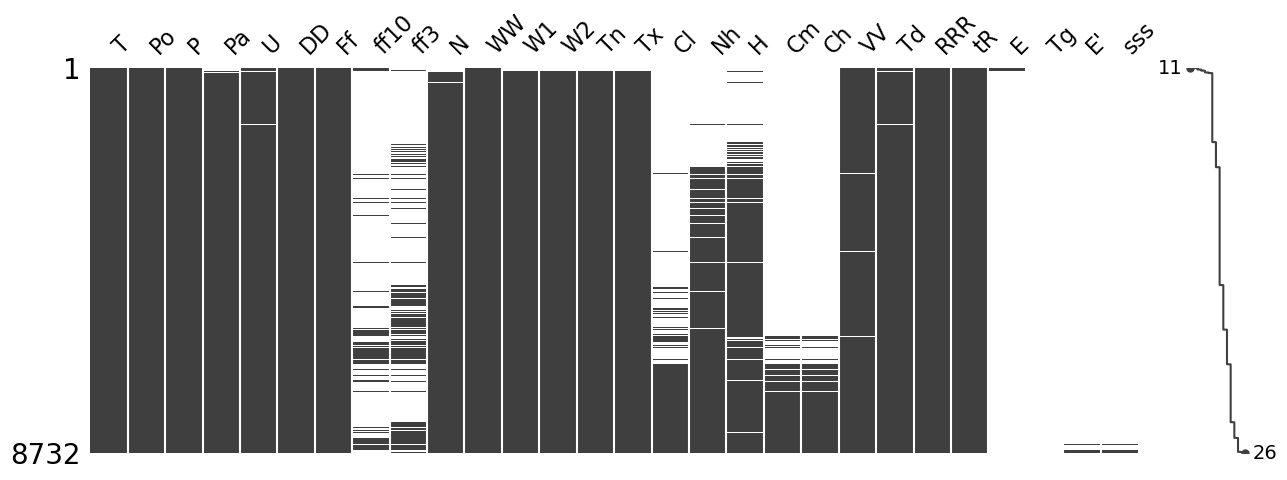

In [9]:
msno.matrix(weather, sort='ascending',figsize=(15,5))
plt.show();

#### ✨ Bar
Counts of non-missing per column

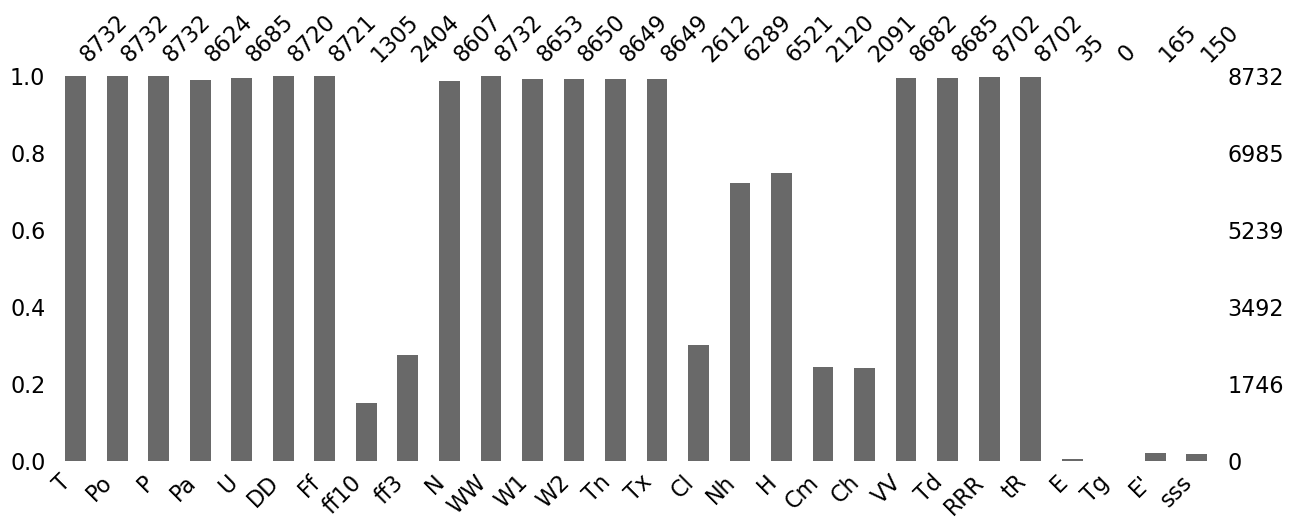

In [10]:
msno.bar(weather, figsize=(15,5));

#### ✨ Heatmap
Heatmap (correlations of missingness between columns). The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another.

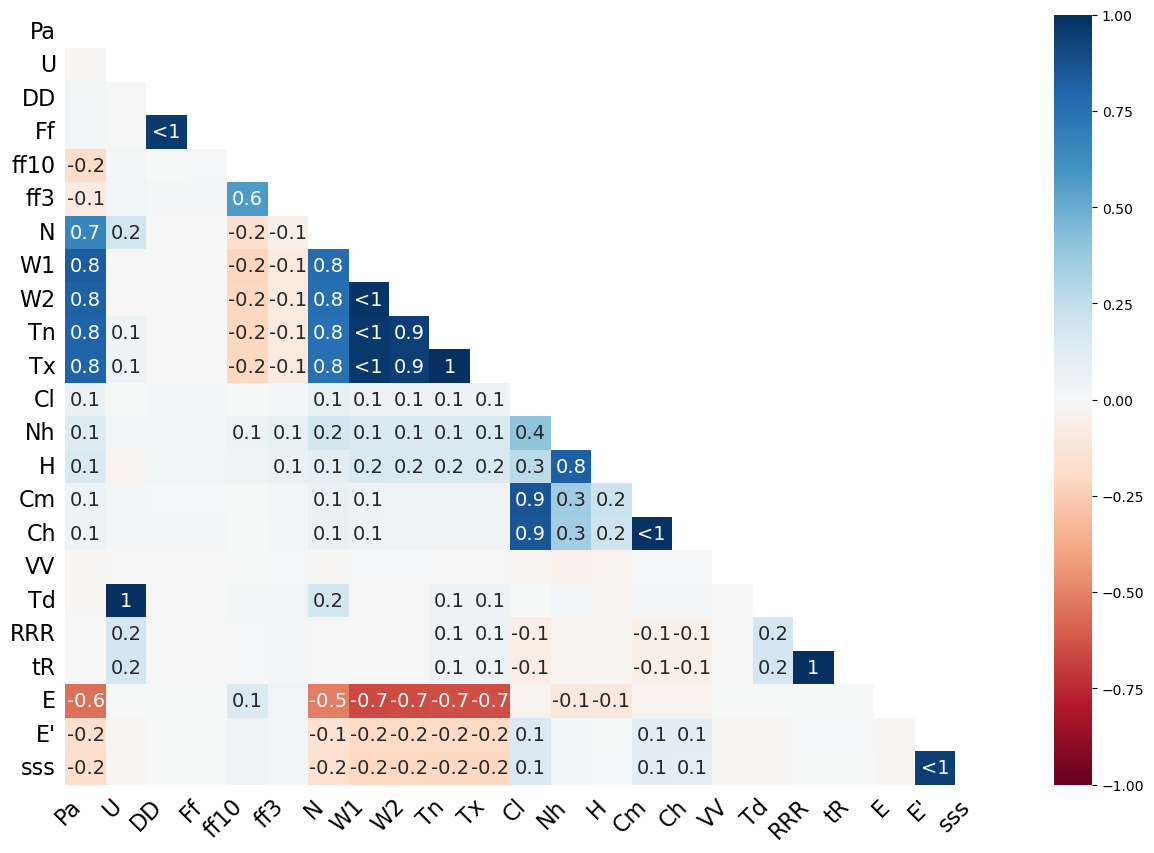

In [11]:
msno.heatmap(weather, figsize=(15,10));

#### ✨ Dendrogram 
Hierarchical clustering of missingness patterns

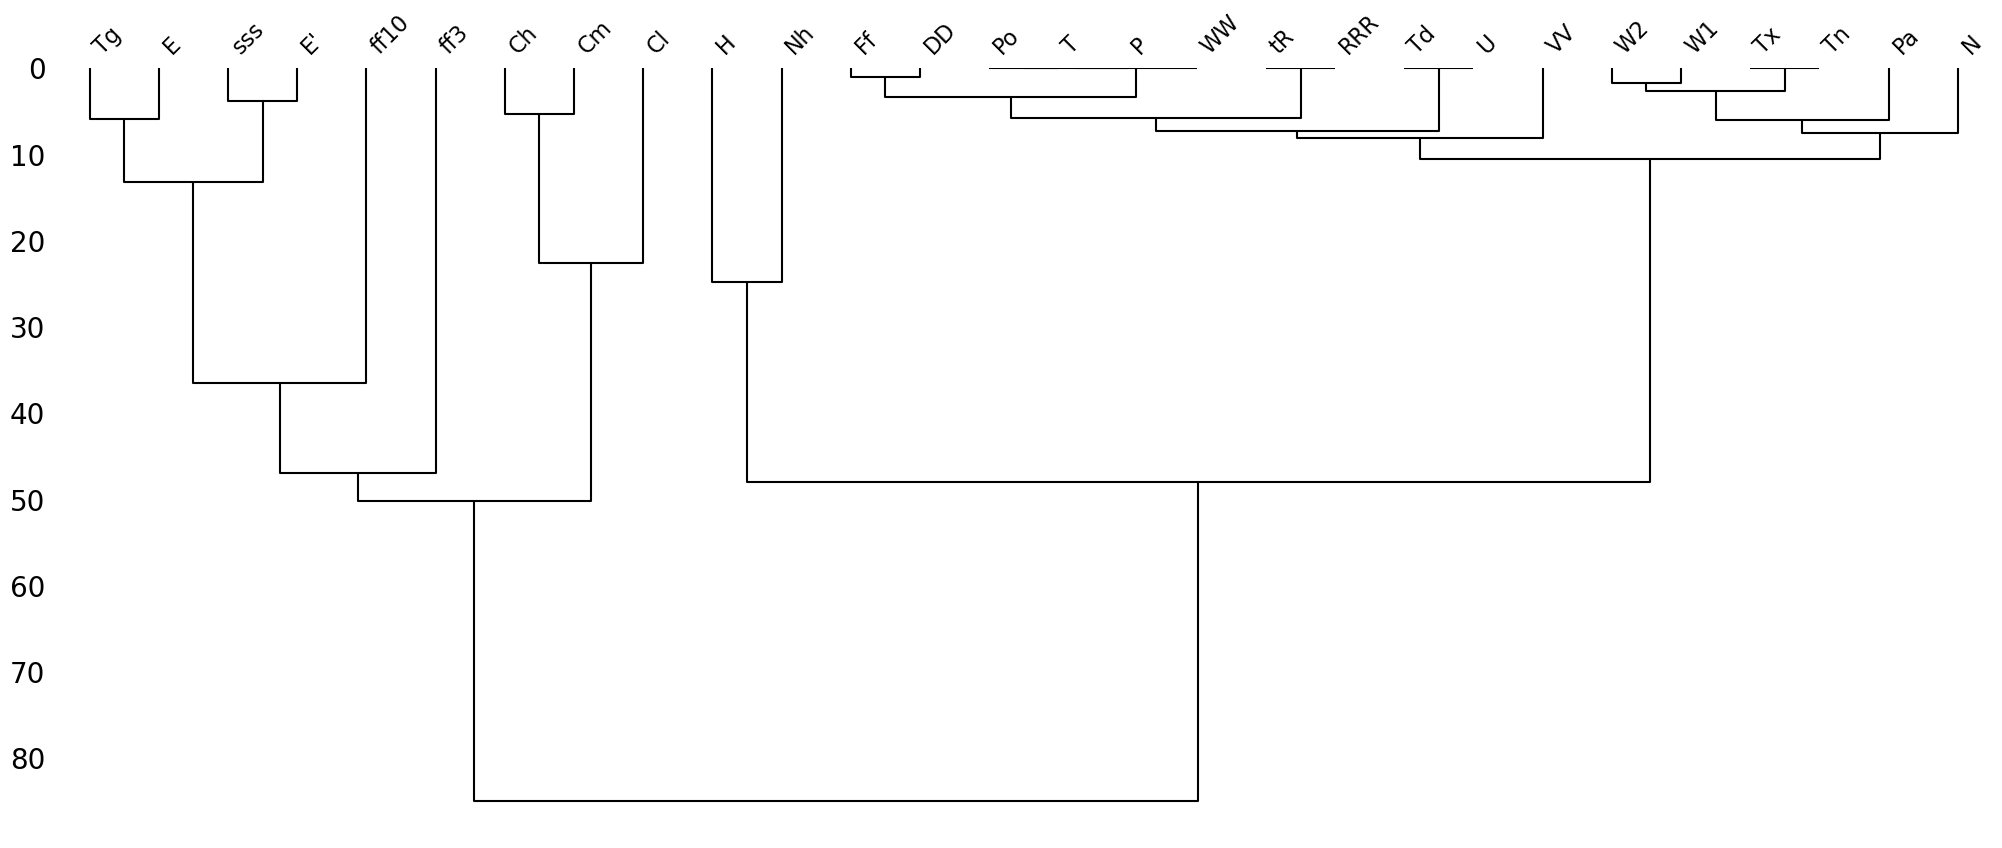

In [12]:
msno.dendrogram(weather);

#### ✅ How to Read These Plots

* **Matrix:** shows missing values as white lines across time — useful for spotting gaps in time series (e.g., meter outages).
* **Bar:** counts missing vs non-missing values per column — quick overview.
* **Heatmap:** highlights if columns tend to be missing together (e.g., temperature & humidity sensors both offline).
* **Dendrogram:** groups columns with similar missingness patterns.


---

👉 `missingno` is **not an imputation tool**, but a **visual aid**: it helps you **decide the right strategy** before filling missing values.

# 🔧 Missing Data Mechanisms
Understanding **why** data is missing helps us choose the right handling strategy.

---

## ✨ MCAR — Missing Completely at Random

* 📖 Definition: The probability of data being missing is **independent of both observed and unobserved values**.
* 🛠️ Example: a **random communication glitch** in a smart meter causes some hourly demand values to drop.
* ✅ Handling:

  * Safe to **delete missing rows** (if not too many).
  * Simple imputations (mean/median) will not bias the dataset.
* ⚡ Energy Example: if **wind speed sensor** fails for 2 random hours, and the failures are not related to actual wind speed, the data is MCAR.

---

## ✨ MAR — Missing At Random

* 📖 Definition: Missingness depends on **other observed variables**, but not on the missing value itself.
* 🛠️ Example: **weather station outages** more common in **remote rural areas** → missing data depends on the station’s location.
* ✅ Handling:

  * Use **imputation with correlated variables** (e.g., regression, multiple imputation).
  * Don’t drop rows blindly, as it can bias results.
* ⚡ Energy Example: **temperature data** may be missing more often in **winter** (sensor icing). If we know the season, missingness is MAR.

---

## ✨ MNAR — Missing Not At Random

* 📖 Definition: Missingness depends on the **unobserved value itself**.
* 🛠️ Example: households with **very high consumption** choose **not to report** data (fear of penalties).
* ✅ Handling:

  * Most difficult case. Requires **domain knowledge** or **explicit modeling of missingness**.
  * Standard imputations can introduce strong bias.
* ⚡ Energy Example: A wind farm may **withhold production data** during very low output hours to avoid fines. The missing values are not random — they are low by design.

---

## ⚠️ Why it matters

* If you assume **MCAR** when data is actually **MNAR**, you risk **biased forecasts and decisions**.
* In practice, we rarely know the exact mechanism.
* Most energy data preprocessing assumes **MCAR or MAR** and uses:

  * **Deletion** (if few values missing),
  * **Interpolation**, or
  * **Multivariate imputation** using related features (temperature, weekday, season).

---

👉 A practical tip: always check if missing values are **correlated with other features** (season, region, device). If yes → it’s likely **MAR**. If missingness clusters at **extremes of the variable itself**, it might be **MNAR**.

---

---
# 🔧 Simple Strategies: Deletion

* **List-wise deletion:** remove entire rows with NaN.
* **Column-wise deletion:** remove variable if too many NaNs (>80%).
* ✅ Simple but dangerous: you lose data!

## ✨ Delete rows

In [13]:
# remove all the rows that contain a missing value
weather.dropna()

,T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
timestamp,,,,,,,,,,,,,,,,,,,,,


## ✨ Delete columns

In [14]:
columns_with_na_dropped = weather.dropna(axis=1)
columns_with_na_dropped.head()

,T,Po,P,WW
timestamp,,,,
2022-12-31 23:00:00,5.8,744.1,747.2,"Rain shower(s), slight."
2022-12-31 22:00:00,5.9,744.3,747.3,No significant weather observed.
2022-12-31 21:00:00,5.8,744.4,747.4,No significant weather observed.
2022-12-31 20:00:00,5.7,744.8,747.8,State of sky on the whole unchanged.
2022-12-31 19:00:00,5.4,744.8,747.9,No significant weather observed.


In [15]:
print("Columns in original dataset: %d \n" % weather.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 28 

Columns with na's dropped: 4


---
# 🧪 Imputation Methods (Univariate)

In [16]:
humidity =  weather[['U']].copy()
humidity.head()

,U
timestamp,
2022-12-31 23:00:00,93.0
2022-12-31 22:00:00,93.0
2022-12-31 21:00:00,93.0
2022-12-31 20:00:00,94.0
2022-12-31 19:00:00,96.0


In [17]:
humidity.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8732 entries, 2022-12-31 23:00:00 to 2022-01-01 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   U       8685 non-null   float64
dtypes: float64(1)
memory usage: 136.4 KB


In [18]:
humidity.isnull().sum()

U    47
dtype: int64

In [19]:
missing = humidity[humidity.isnull()['U'] == True]
missing.head(5)

,U
timestamp,
2022-12-30 05:00:00,NaN
2022-12-30 04:00:00,NaN
2022-12-23 09:00:00,NaN
2022-12-23 08:00:00,NaN
2022-12-21 14:00:00,NaN


## 🔧 Constant 🧪 Imputation

💡 Be careful with 0 values, ok for demand/production, but is it ok for temperature???

In [20]:
const = pd.DataFrame(humidity['U'].fillna(0))
const.rename(columns = {'U':'const'}, inplace=True)
missing = missing.join(const) 

## 🔧 Mean / Median 🧪 Imputation

In [21]:
median = pd.DataFrame(humidity['U'].fillna(humidity['U'].median()))
median.rename(columns = {'U':'median'}, inplace=True)

missing = missing.join(median) 

In [22]:
mean = pd.DataFrame(humidity['U'].fillna(humidity['U'].mean()))
mean.rename(columns = {'U':'mean'}, inplace=True)

missing = missing.join(mean) 

In [23]:
missing

,U,const,median,mean
timestamp,,,,
2022-12-30 05:00:00,NaN,0.0,84.0,78.729303
2022-12-30 04:00:00,NaN,0.0,84.0,78.729303
2022-12-23 09:00:00,NaN,0.0,84.0,78.729303
2022-12-23 08:00:00,NaN,0.0,84.0,78.729303
2022-12-21 14:00:00,NaN,0.0,84.0,78.729303
2022-12-15 10:00:00,NaN,0.0,84.0,78.729303
2022-12-15 09:00:00,NaN,0.0,84.0,78.729303
2022-11-16 23:00:00,NaN,0.0,84.0,78.729303
2022-11-14 06:00:00,NaN,0.0,84.0,78.729303


* ✅ Keeps dataset size intact.
* ⚠️ Can **bias correlations** and underestimate variance.

---

## 🔧 Hot Deck 🧪 Imputation (Forward/Backward Fill)

```python
df_ffill = df.fillna(method="ffill")  # 🔧 last observation carried forward
df_bfill = df.fillna(method="bfill")  # 🔧 next observation carried backward
```

⚡ Useful for **time series** (e.g., missing hourly demand → carry last valid reading).

In [24]:
# replace all NA's the value that comes directly after it in the same column, 
# then replace all the remaining na's with 0
bfill = pd.DataFrame(humidity.fillna(method='bfill', axis=0).fillna(0))
bfill.rename(columns = {'U':'bfill'}, inplace=True)

missing = missing.join(bfill) 

In [25]:
# previous
pad = pd.DataFrame(humidity.fillna(method='ffill', axis=0).fillna(0))
pad.rename(columns = {'U':'pad'}, inplace=True)

missing = missing.join(pad) 

In [26]:
missing

,U,const,median,mean,bfill,pad
timestamp,,,,,,
2022-12-30 05:00:00,NaN,0.0,84.0,78.729303,99.0,100.0
2022-12-30 04:00:00,NaN,0.0,84.0,78.729303,99.0,100.0
2022-12-23 09:00:00,NaN,0.0,84.0,78.729303,99.0,99.0
2022-12-23 08:00:00,NaN,0.0,84.0,78.729303,99.0,99.0
2022-12-21 14:00:00,NaN,0.0,84.0,78.729303,99.0,97.0
2022-12-15 10:00:00,NaN,0.0,84.0,78.729303,100.0,98.0
2022-12-15 09:00:00,NaN,0.0,84.0,78.729303,100.0,98.0
2022-11-16 23:00:00,NaN,0.0,84.0,78.729303,99.0,97.0
2022-11-14 06:00:00,NaN,0.0,84.0,78.729303,100.0,100.0


---

## 🔧 Interpolation

```python
df_interp = df.interpolate(method="linear")
```

📊 Fits a line between neighbors.
✅ Great for smooth signals like demand or temperature.
⚠️ Wrong if the process is not continuous (e.g., sudden outage).

---


In [27]:
li = humidity.interpolate(method ='linear', limit_direction ='forward')
li.rename(columns = {'U':'li'}, inplace=True)

missing = missing.join(li) 

In [28]:
missing

,U,const,median,mean,bfill,pad,li
timestamp,,,,,,,
2022-12-30 05:00:00,NaN,0.0,84.0,78.729303,99.0,100.0,99.666667
2022-12-30 04:00:00,NaN,0.0,84.0,78.729303,99.0,100.0,99.333333
2022-12-23 09:00:00,NaN,0.0,84.0,78.729303,99.0,99.0,99.000000
2022-12-23 08:00:00,NaN,0.0,84.0,78.729303,99.0,99.0,99.000000
2022-12-21 14:00:00,NaN,0.0,84.0,78.729303,99.0,97.0,98.000000
2022-12-15 10:00:00,NaN,0.0,84.0,78.729303,100.0,98.0,98.666667
2022-12-15 09:00:00,NaN,0.0,84.0,78.729303,100.0,98.0,99.333333
2022-11-16 23:00:00,NaN,0.0,84.0,78.729303,99.0,97.0,98.000000
2022-11-14 06:00:00,NaN,0.0,84.0,78.729303,100.0,100.0,100.000000


# 🤖 Regression / Model-based 🧪 Imputation

Instead of filling missing values with a constant, mean, or interpolation, we can try to **predict missing values** using other available features. This approach assumes that there are **relationships between variables** that can be exploited.

* **Idea:** treat the missing column as the *target variable*, and use other columns (or time features) as *predictors*.
* **Implementation:** fit a regression model on the **non-missing data**, then predict values for the **missing rows**.
* **Tools:** scikit-learn’s `Linear🤖 Regression`, `RandomForestRegressor`, or more advanced imputation techniques (e.g., `IterativeImputer`).

---

### ⚡ Energy Example

* Suppose we are missing some **humidity values** in a weather dataset.
* We can use **hour of day**, **temperature**, and **wind speed** as predictors in a regression model.
* The model learns typical patterns (e.g., humidity tends to be higher at night, lower during sunny hours).
* Missing humidity values are then predicted based on these relationships.

---

### ✅ Pros & Cons

* ✅ **Uses correlations** between variables → often more accurate than mean or interpolation.
* ✅ Preserves variability and seasonal patterns.
* ⚠️ Requires enough **predictor variables** and **non-missing data** to train a reliable model.
* ⚠️ If the regression is poorly specified, it may introduce **systematic bias**.

---

👉 In practice:

* Use **regression-based imputation** when your dataset has **rich contextual features** (time of day, weather, calendar).
* Stick to **simpler methods** (forward fill, interpolation) for short gaps in continuous time series.


# 🔧 Multivariate 🧪 Imputation

For richer datasets (demand + temperature + wind + prices), we can use **Iterative Imputer** or **MICE (Multiple 🧪 Imputation by Chained Equations)**.

* MICE https://medium.com/@brijesh_soni/topic-9-mice-or-multivariate-imputation-with-chain-equation-f8fd435ca91

In [29]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer, SimpleImputer

## ✨ Simple imputers

In [30]:
#imputer = SimpleImputer(strategy='mean')
#imputer = SimpleImputer(strategy='median')

## ✨ KNN Imputer

In [31]:
imputer = KNNImputer(n_neighbors=5)

imputed_values = imputer.fit_transform(weather.reset_index()[['U','T']])
imputed_values = pd.DataFrame(imputed_values[:,0])
imputed_values.set_index(humidity.index, inplace=True)
imputed_values.rename(columns = {0:'mice'}, inplace=True)

In [32]:
missing = missing.join(imputed_values) 

## ✨ Iterative Imputer

In [33]:

multi_df = pd.DataFrame({
    "demand": [500, 520, np.nan, 600, 610],
    "temp": [0, 1, 3, np.nan, 7]
})

imp = IterativeImputer(random_state=0)
multi_filled = pd.DataFrame(imp.fit_transform(multi_df), columns=multi_df.columns)
print(multi_filled)

       demand      temp
0  500.000000  0.000000
1  520.000000  1.000000
2  548.520724  3.000000
3  600.000000  6.322985
4  610.000000  7.000000


# ✅ Summary

* Start with **detecting missing values** (`.isna()`, visual tools).
* Decide: **delete** (if few NaNs) or **impute**.
* Choose method:

  * 🟢 **Forward/Backward fill** for time series.
  * 🟢 **Mean/Median** if few values are missing.
  * 🟢 **Interpolation** for smooth signals.
  * 🟢 **🤖 Regression/Multivariate** if relationships exist.
* Be aware of the **mechanism** (MCAR, MAR, MNAR).

---

In [34]:
missing

,U,const,median,mean,bfill,pad,li,mice
timestamp,,,,,,,,
2022-12-30 05:00:00,NaN,0.0,84.0,78.729303,99.0,100.0,99.666667,81.6
2022-12-30 04:00:00,NaN,0.0,84.0,78.729303,99.0,100.0,99.333333,78.4
2022-12-23 09:00:00,NaN,0.0,84.0,78.729303,99.0,99.0,99.000000,81.0
2022-12-23 08:00:00,NaN,0.0,84.0,78.729303,99.0,99.0,99.000000,93.6
2022-12-21 14:00:00,NaN,0.0,84.0,78.729303,99.0,97.0,98.000000,81.6
2022-12-15 10:00:00,NaN,0.0,84.0,78.729303,100.0,98.0,98.666667,89.0
2022-12-15 09:00:00,NaN,0.0,84.0,78.729303,100.0,98.0,99.333333,78.8
2022-11-16 23:00:00,NaN,0.0,84.0,78.729303,99.0,97.0,98.000000,76.8
2022-11-14 06:00:00,NaN,0.0,84.0,78.729303,100.0,100.0,100.000000,98.4
